## Using Q-Learning: Off-Policy Learning

### Part 1: Implementation of Easy21

Same 2 same

In [1]:
import random, numpy as np

In [2]:
def draw_card():
    value = random.randint(1, 10)
    colour_value = random.random()
    if colour_value < 0.33:
        return -value
    else:
        return value

In [3]:
def step(s, a): # s is the state (top card of dealer, total sum of cards of player) of the game, a is the action (hit or stick), shoud sample a next state s' and reward r.
    if a == 0: # hit
        if s[1] < 21:
            card_value = draw_card() # should return appropriate value of card with correct sign (black -> add, red -> subtract)
            s_new = (s[0], s[1] + card_value)
            if s_new[1] > 21 or s_new[1]< 1 : # player busts
                return s_new, -1
            else:
                return s_new, 0
        else:
            return s, 0
    else: # stick
        dealer_card = draw_card()
        while dealer_card < 17: # dealer hits until the sum is at least 17
            dealer_card += draw_card()
        if dealer_card > 21: # dealer busts
            return s, 1
        elif dealer_card < s[1]: # player wins
            return s, 1
        elif dealer_card == s[1]: # draw
            return s, 0
        else: # dealer wins
            return s, -1

# What is the exact meaning of the "top card of the dealer"?, we are not updating that anywhere in the game, so not sure why it is needed.

### Part 2: Q-Learning implementation

In [ ]:
N = np.zeros((11, 22, 2, 11))
V = np.zeros((11, 22, 2, 11))
N0 = 100
gamma = 1.0

number_of_episodes = 100000
lambda_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for lambda_idx, lambda_val in enumerate(lambda_values):
    for episode in range(number_of_episodes):
        top_card = random.randint(1, 10)
        player_sum = random.randint(1, 10)
        s = (top_card, player_sum)
        a = 0 if random.random() < 0.5 else 1
        N[top_card, player_sum, a, lambda_idx] += 1

        while True:
            s_new, r = step(s, a)

            if s_new[1] >= 1 and s_new[1] <= 21:
                N[s_new[0], s_new[1], a, lambda_idx] += 1
                epsilon_t = N0 / (N0 + N[s_new[0], s_new[1], a, lambda_idx])
                a_new = np.argmax(V[s[0], s[1], :, lambda_idx]) if random.random() > epsilon_t else random.randint(0, 1)
                alpha_t = 1 / N[s_new[0], s_new[1], a, lambda_idx]

                V[s[0], s[1], a, lambda_idx] += alpha_t * (r + gamma * max(V[s_new[0], s_new[1], :, lambda_idx]) - V[s[0], s[1], a, lambda_idx])

                s = s_new
                a = a_new

            if r != 0:
                break

### Part 3: Plotting the value function and optimal policy

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_for_lambda(l):
    l = int(l * 10)
    Z_0 = np.transpose(V[:, :, 0, l])
    Z_1 = np.transpose(V[:, :, 1, l])
    Z = np.maximum(Z_0, Z_1)
    Z_diff = Z_1 - Z_0
    optimal_policy = np.argmax(V[:, :, :, l], axis=2)

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.arange(0, 11), np.arange(0, 22))
    ax.plot_surface(X, Y, Z_0, cmap='viridis')
    ax.set_xlabel('Dealer Top Card')
    ax.set_ylabel('Player Total Value')
    ax.set_zlabel('Value of Hit Action')
    ax.set_title('Value Function for Easy21 - Hit Action')
    plt.show()

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z_1, cmap='viridis')
    ax.set_xlabel('Dealer Top Card')
    ax.set_ylabel('Player Total Value')
    ax.set_zlabel('Value of Stick Action')
    ax.set_title('Value Function for Easy21 - Stick Action')
    plt.show()

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('Dealer Top Card')
    ax.set_ylabel('Player Total Value')
    ax.set_zlabel('Value of Optimal Action')
    ax.set_title('Optimal Value Function for Easy21')
    plt.show()

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z_diff, cmap='viridis')
    ax.set_xlabel('Dealer Top Card')
    ax.set_ylabel('Player Total Value')
    ax.set_zlabel('Difference in Action Values')
    ax.set_title('Difference in Value Function for Easy21')
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.imshow(optimal_policy.T, origin='lower', aspect='auto', cmap='coolwarm')
    plt.colorbar(label='Action (0: Hit, 1: Stick)')
    plt.xlabel('Dealer Top Card')
    plt.ylabel('Player Total Value')
    plt.title('Optimal Policy for Easy21 (0: Hit, 1: Stick)')
    plt.xticks(ticks=np.arange(optimal_policy.shape[0]), labels=np.arange(optimal_policy.shape[0]))
    plt.yticks(ticks=np.arange(optimal_policy.shape[1]), labels=np.arange(optimal_policy.shape[1]))
    plt.show()

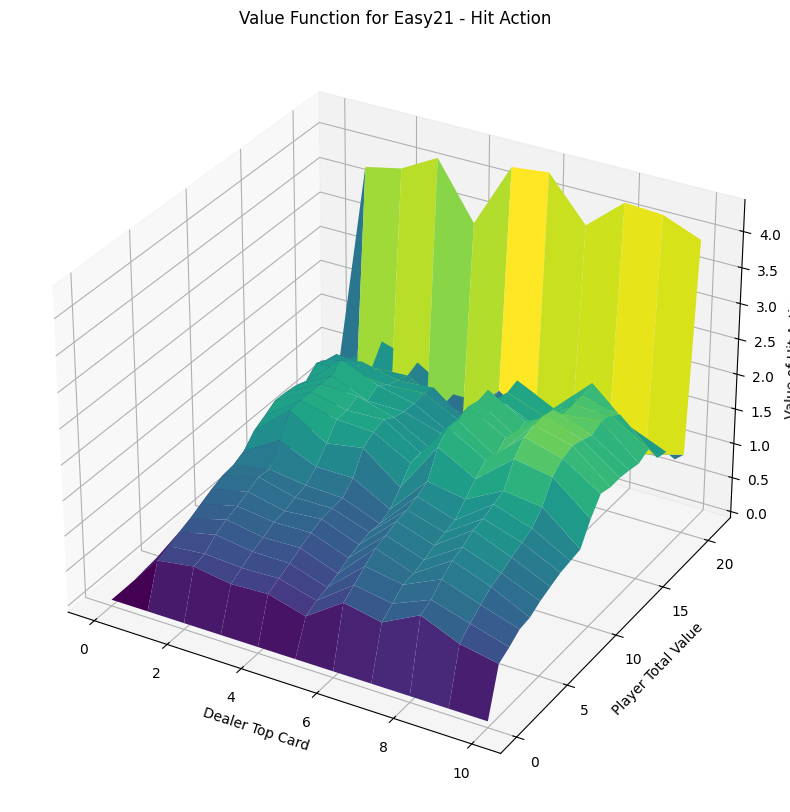

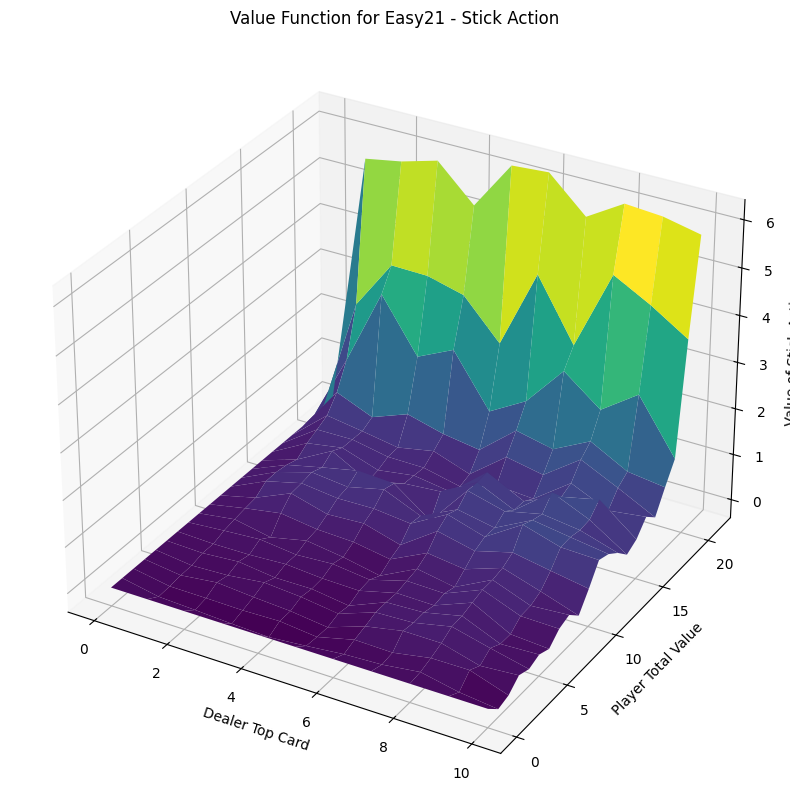

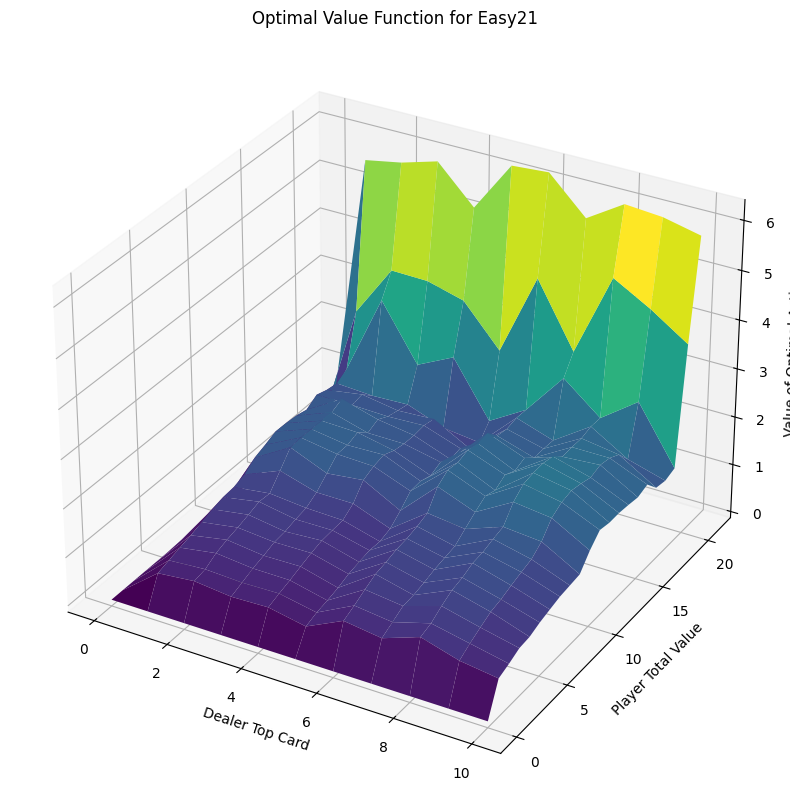

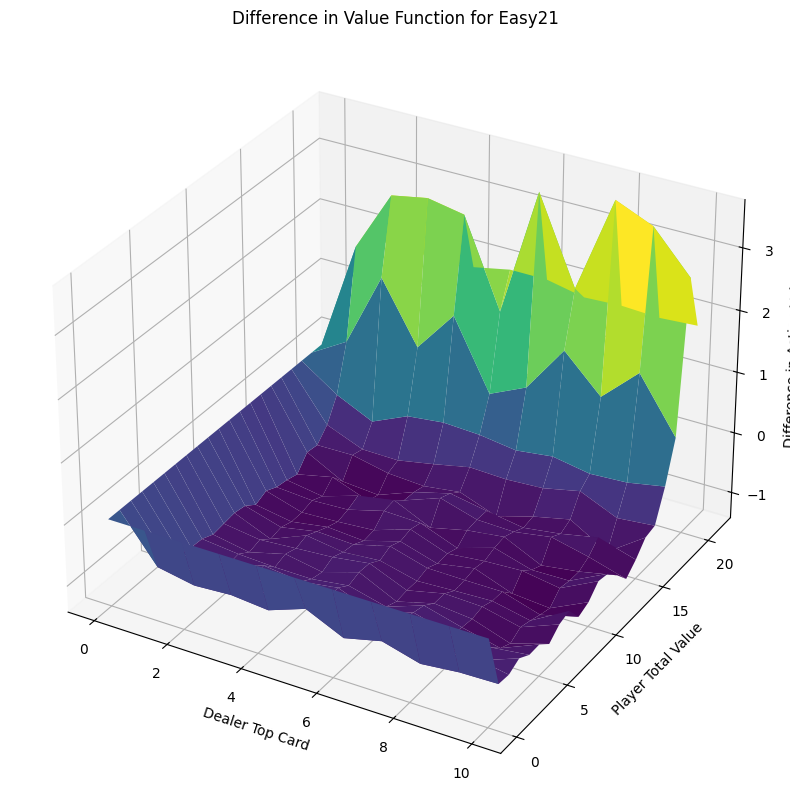

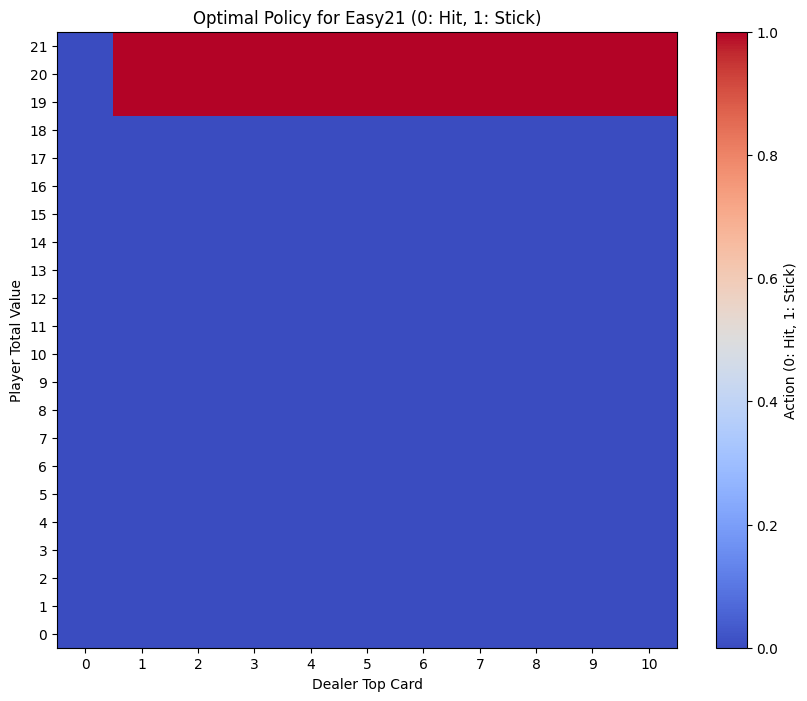

In [10]:
plot_for_lambda(1)